In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

In [2]:
# roughness_dir = "/Volumes/SEAGATE/roughness_apr2016_from_PH/roughness_predicted"
roughness_dir = "/Volumes/SEAGATE/roughness_apr2016_from_PH/roughness_predicted"

In [3]:
os.path.isdir(roughness_dir)

True

In [4]:
# path to training dataset

trainingDS_dir = "/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research/training_dataset"
trainingDS_csv = "training_dataset_myMethod_averaged_april_2016_9cam3bands_pandasMethod_finalDS_forML_withCount.csv"


In [5]:
# open/read input dataset

atm_trainigDS_fp = os.path.join(trainingDS_dir, trainingDS_csv)
atm_transect = pd.read_csv(atm_trainigDS_fp)

In [6]:
atm_transect.shape

(109367, 21)

In [7]:
atm_transect.head()

,path,orbit,block,line,sample,count,lat,lon,Da_r,Ca_r,...,Aa_r,An_r,An_g,An_b,An_nir,Af_r,Bf_r,Cf_r,Df_r,mean_ATM_roughness
0,0.0,0.0,0.0,0.0,0.0,13.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,152.0,86922.0,9.0,75.0,1205.0,4.0,74.422271,215.544237,1.032030,0.843970,...,0.624330,0.597250,0.476420,0.767230,-99.0,0.701050,0.926720,1.390070,2.155820,5.217500
2,152.0,86922.0,9.0,74.0,1205.0,15.0,74.421802,215.546115,1.033530,0.836450,...,0.615300,0.589730,0.483930,0.765730,-99.0,0.699550,0.946270,1.396090,2.155820,6.237333
3,152.0,86922.0,9.0,74.0,1206.0,37.0,74.420161,215.541475,1.039387,0.833521,...,0.612371,0.585342,0.479552,0.765730,-99.0,0.703938,0.931636,1.384385,2.129472,6.747568
4,152.0,86922.0,9.0,74.0,1207.0,26.0,74.418225,215.535986,1.042444,0.839692,...,0.614032,0.583999,0.473873,0.765788,-99.0,0.696829,0.926546,1.367394,2.112479,8.174231


In [8]:
# remove zeros


filter_zeros_cond = (atm_transect['path']==0) & (atm_transect['orbit']==0) & (atm_transect['block']==0)
zero_index_list = atm_transect.index[filter_zeros_cond].tolist()
atm_transect.drop(labels=zero_index_list, axis=0, inplace=True)
atm_transect.head()

,path,orbit,block,line,sample,count,lat,lon,Da_r,Ca_r,...,Aa_r,An_r,An_g,An_b,An_nir,Af_r,Bf_r,Cf_r,Df_r,mean_ATM_roughness
1,152.0,86922.0,9.0,75.0,1205.0,4.0,74.422271,215.544237,1.032030,0.843970,...,0.624330,0.597250,0.476420,0.767230,-99.0,0.701050,0.926720,1.390070,2.155820,5.217500
2,152.0,86922.0,9.0,74.0,1205.0,15.0,74.421802,215.546115,1.033530,0.836450,...,0.615300,0.589730,0.483930,0.765730,-99.0,0.699550,0.946270,1.396090,2.155820,6.237333
3,152.0,86922.0,9.0,74.0,1206.0,37.0,74.420161,215.541475,1.039387,0.833521,...,0.612371,0.585342,0.479552,0.765730,-99.0,0.703938,0.931636,1.384385,2.129472,6.747568
4,152.0,86922.0,9.0,74.0,1207.0,26.0,74.418225,215.535986,1.042444,0.839692,...,0.614032,0.583999,0.473873,0.765788,-99.0,0.696829,0.926546,1.367394,2.112479,8.174231
5,152.0,86922.0,9.0,73.0,1207.0,10.0,74.417085,215.535168,1.039550,0.845480,...,0.619820,0.591230,0.485440,0.767230,-99.0,0.704060,0.922200,1.364500,2.119710,6.029000


In [9]:
# select a smaller subset of transect, like the first 1000 points (or 10)

# max_step = 1119
# max_step = 20462
max_step = 1000

atm_transect_small = atm_transect.iloc[0:max_step]

In [10]:
atm_transect_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                1000 non-null   float64
 1   orbit               1000 non-null   float64
 2   block               1000 non-null   float64
 3   line                1000 non-null   float64
 4   sample              1000 non-null   float64
 5   count               1000 non-null   float64
 6   lat                 1000 non-null   float64
 7   lon                 1000 non-null   float64
 8   Da_r                1000 non-null   float64
 9   Ca_r                1000 non-null   float64
 10  Ba_r                1000 non-null   float64
 11  Aa_r                1000 non-null   float64
 12  An_r                1000 non-null   float64
 13  An_g                1000 non-null   float64
 14  An_b                1000 non-null   float64
 15  An_nir              1000 non-null   float64
 16  Af_r  

In [11]:
atm_transect_small = atm_transect_small.astype({'path':int, 'orbit':int, 'block':int, 'line':int, 'sample':int})
atm_transect_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                1000 non-null   int64  
 1   orbit               1000 non-null   int64  
 2   block               1000 non-null   int64  
 3   line                1000 non-null   int64  
 4   sample              1000 non-null   int64  
 5   count               1000 non-null   float64
 6   lat                 1000 non-null   float64
 7   lon                 1000 non-null   float64
 8   Da_r                1000 non-null   float64
 9   Ca_r                1000 non-null   float64
 10  Ba_r                1000 non-null   float64
 11  Aa_r                1000 non-null   float64
 12  An_r                1000 non-null   float64
 13  An_g                1000 non-null   float64
 14  An_b                1000 non-null   float64
 15  An_nir              1000 non-null   float64
 16  Af_r  

In [12]:
atm_transect_small.head()

,path,orbit,block,line,sample,count,lat,lon,Da_r,Ca_r,...,Aa_r,An_r,An_g,An_b,An_nir,Af_r,Bf_r,Cf_r,Df_r,mean_ATM_roughness
1,152,86922,9,75,1205,4.0,74.422271,215.544237,1.032030,0.843970,...,0.624330,0.597250,0.476420,0.767230,-99.0,0.701050,0.926720,1.390070,2.155820,5.217500
2,152,86922,9,74,1205,15.0,74.421802,215.546115,1.033530,0.836450,...,0.615300,0.589730,0.483930,0.765730,-99.0,0.699550,0.946270,1.396090,2.155820,6.237333
3,152,86922,9,74,1206,37.0,74.420161,215.541475,1.039387,0.833521,...,0.612371,0.585342,0.479552,0.765730,-99.0,0.703938,0.931636,1.384385,2.129472,6.747568
4,152,86922,9,74,1207,26.0,74.418225,215.535986,1.042444,0.839692,...,0.614032,0.583999,0.473873,0.765788,-99.0,0.696829,0.926546,1.367394,2.112479,8.174231
5,152,86922,9,73,1207,10.0,74.417085,215.535168,1.039550,0.845480,...,0.619820,0.591230,0.485440,0.767230,-99.0,0.704060,0.922200,1.364500,2.119710,6.029000


In [13]:
# set filters to select a MISR block

path_filter = (atm_transect_small['path']==152)
orbit_filter = (atm_transect_small['orbit']==86922)
block_filter = (atm_transect_small['block']==20)

atm_transect_small_filtered = atm_transect_small.loc[path_filter & orbit_filter]
atm_transect_small_filtered.shape

(366, 21)

In [14]:
# sort by column ("line")

atm_transect_small_filtered.sort_values(by='line', axis=0, inplace=True) # axis=0 == column names
atm_transect_small_filtered.head(10)


/Applications/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,path,orbit,block,line,sample,count,lat,lon,Da_r,Ca_r,...,Aa_r,An_r,An_g,An_b,An_nir,Af_r,Bf_r,Cf_r,Df_r,mean_ATM_roughness
340,152,86922,9,0,1395,17.0,74.006427,214.507224,1.00745,0.82658,...,0.62181,0.59490,0.48381,0.77575,-99.0,0.71149,0.95812,1.40504,-1.0,11.288824
343,152,86922,9,0,1396,1.0,74.005205,214.502519,1.01044,0.83107,...,0.62928,0.60536,0.48978,0.77575,-99.0,0.72195,0.97008,1.42746,-1.0,13.370000
335,152,86922,9,0,1391,14.0,74.013950,214.526828,1.00894,0.82957,...,0.63077,0.60238,0.48679,0.76678,-99.0,0.72046,0.95513,1.41700,-1.0,13.755714
339,152,86922,9,0,1394,35.0,74.008095,214.511962,1.01343,0.83555,...,0.62629,0.58444,0.48530,0.76379,-99.0,0.70252,0.93869,1.38262,-1.0,10.485429
337,152,86922,9,0,1392,33.0,74.012460,214.522162,1.01193,0.83555,...,0.62779,0.60088,0.48679,0.77575,-99.0,0.71448,0.94915,1.40056,-1.0,12.942424
338,152,86922,9,0,1393,36.0,74.010282,214.517176,1.01791,0.83705,...,0.63077,0.59789,0.48679,0.77126,-99.0,0.71000,0.94317,1.41551,-1.0,9.466667
330,152,86922,9,1,1388,4.0,74.020161,214.543182,1.00147,0.82658,...,0.62330,0.60088,0.48679,0.77276,-99.0,0.72046,0.96858,1.42149,-1.0,5.327500
336,152,86922,9,1,1392,3.0,74.013762,214.523215,1.01641,0.83705,...,0.63227,0.60088,0.48679,0.77724,-99.0,0.71448,0.94766,1.40205,-1.0,8.803333
332,152,86922,9,1,1389,26.0,74.018818,214.538259,1.00446,0.82808,...,0.62928,0.60088,0.48530,0.77425,-99.0,0.72494,0.96559,1.41999,-1.0,4.841154
333,152,86922,9,1,1390,36.0,74.016881,214.533144,1.00745,0.82957,...,0.63526,0.59789,0.48978,0.77425,-99.0,0.72793,0.95812,1.41700,-1.0,5.126667


In [15]:
# check for duplicates in rows of dataset




## find roughess.dat files

In [16]:
misr_roughness_in_pixel_list = []


# for irow in range(atm_transect_small.shape[0]):
for irow in range(atm_transect_small_filtered.shape[0]):


#     path = atm_transect_small['#path'].iloc[irow]
#     orbit = atm_transect_small[' orbit'].iloc[irow]
#     block = atm_transect_small[' img_block'].iloc[irow]
#     line = atm_transect_small[' line'].iloc[irow]
#     sample = atm_transect_small[' sample'].iloc[irow]
    
    
    path = atm_transect_small_filtered['path'].iloc[irow]
    orbit = atm_transect_small_filtered['orbit'].iloc[irow]
    block = atm_transect_small_filtered['block'].iloc[irow]
    line = atm_transect_small_filtered['line'].iloc[irow]
    sample = atm_transect_small_filtered['sample'].iloc[irow]


    # zfill() path and string it
    if path < 100:
        path_str = str(path).zfill(3)
    else:
        path_str = str(path)


    # zfill() block and string it
    if block < 10:
        block_str = str(block).zfill(2)
    else:
        block_str = str(block)


    # pattern of roughness.dat file
    roughness_file_pattern = "roughness_toa_refl_P"+path_str+"_O0"+str(orbit)+"_B0"+block_str+".dat"
    print(roughness_file_pattern)

    # find roughness file
    rough_file_list = glob.glob(os.path.join(roughness_dir, roughness_file_pattern))

    if (len(rough_file_list) < 1):
        raise ValueError("roughness list came out empty!")

    if (len(rough_file_list) > 1):
        raise ValueError("roughness list has more that 1 file! there should be an error in our logic!")


    # open it and change binary to array
    rough_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
#     print(rough_2d_arr.shape)
    roughness_in_pixel = rough_2d_arr[int(line), int(sample)]
    
    if roughness_in_pixel > 1:
        misr_roughness_in_pixel_list.append(roughness_in_pixel)
    else:
        raise ValueError("why MISR roughness is negative for an ATM location? model error? or something else?")

        
print("\ntotal MISR roughness files: %s" %len(misr_roughness_in_pixel_list))

roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_re

roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_refl_P152_O086922_B009.dat
roughness_toa_re

In [17]:
# misr_roughness_in_pixel_list

## plot transect

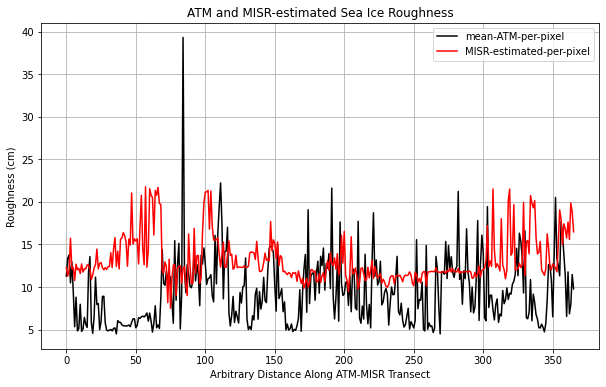

In [18]:
x = range(len(misr_roughness_in_pixel_list))

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(x, atm_transect_small_filtered['mean_ATM_roughness'], color='black', label='mean-ATM-per-pixel')
ax.plot(x, misr_roughness_in_pixel_list, color='red', label='MISR-estimated-per-pixel')

# Same as above
ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
ax.set_ylabel('Roughness (cm)')
ax.set_title('ATM and MISR-estimated Sea Ice Roughness')
ax.grid(True)
ax.legend(loc='upper right');

## plot histogram

Text(0.5, 1.0, 'Histogram')

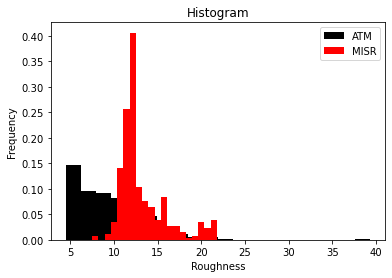

In [19]:
plt.hist(atm_transect_small_filtered['mean_ATM_roughness'], density=True, bins=20, label='ATM', color='black')  # density=False would make counts
plt.hist(misr_roughness_in_pixel_list, density=True, bins=20, label='MISR', color='red')  # density=False would make counts

plt.xlabel('Roughness')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title("Histogram")


## statistics